In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/data/wine_new.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
df.columns #필드명 확인

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [3]:
df.shape #데이터의 형태

(1599, 13)

In [4]:
df.describe() #기초통계량

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [6]:
df.groupby("class").mean() #클래스별 평균값

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
class,,,,,,,,,,,,
0,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
1,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


Text(0, 0.5, '빈도')

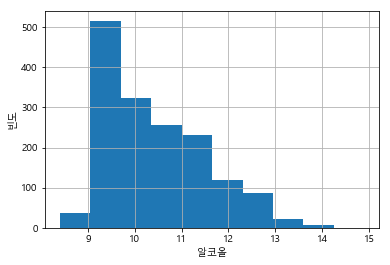

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)
df["alcohol"].hist()
plt.xlabel("알코올")
plt.ylabel("빈도")

In [8]:
df["class"].value_counts()

1    855
0    744
Name: class, dtype: int64

Text(0.5, 1.0, '분류=n(0:bad, 1:good)')

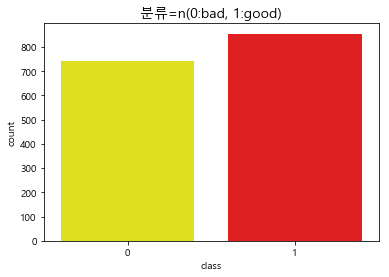

In [9]:
import seaborn as sns
colors=["yellow","red"]
sns.countplot("class",data=df,palette=colors)
plt.title("분류=n(0:bad, 1:good)",fontsize=14)

In [10]:
train_cols=df.columns[0:11]
X=df[train_cols] #독립변수
y=df["class"] #종속변수

In [11]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["class"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [12]:
df2["class"].value_counts()

1    744
0    744
Name: class, dtype: int64

In [13]:
X=X_samp[train_cols]
y=y_samp["class"]

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
model=DecisionTreeClassifier(random_state=0) #의사결정나무 모형 생성
model.fit(X_train,y_train) #모형 훈련(학습)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [16]:
print(model.score(X_train,y_train)) #학습용 예측정확도
print(model.score(X_test,y_test))  #검증용 예측정확도

1.0
0.7953020134228188


In [27]:
model=DecisionTreeClassifier(max_depth=10,random_state=0) #가지치기
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [28]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test)) 

0.9663865546218487
0.8087248322147651


In [17]:
# plt.rcParams["figure.figsize"]=(16,9)
# plt.rcParams["font.size"]=14
# plt.boxplot(X_train)
# plt.xlabel("특성 목록")
# plt.ylabel("특성 크기")

In [18]:
# #데이터 전처리
# min_on_training=X_train.min(axis=0)
# range_on_training=(X_train - min_on_training).max(axis=0)
# #학습용,검증용 데이터셋 표준화(0~1 사이의 값으로 스케일링)
# X_train_scaled=(X_train-min_on_training) / range_on_training
# X_test_scaled=(X_test-min_on_training) / range_on_training
# print(X_train_scaled.min(axis=0))
# print(X_train_scaled.max(axis=0))
# print(X_test_scaled.min(axis=0))
# print(X_test_scaled.max(axis=0))

In [19]:
# model=DecisionTreeClassifier(max_depth=4,random_state=0) #의사결정나무 모형 생성
# model.fit(X_train_scaled,y_train) #모형 훈련(학습)

In [20]:
# print(model.score(X_train_scaled,y_train))
# print(model.score(X_test_scaled,y_test)) 

In [29]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
cm

array([[123,  24],
       [ 33, 118]], dtype=int64)

In [22]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,124,23
1,46,105


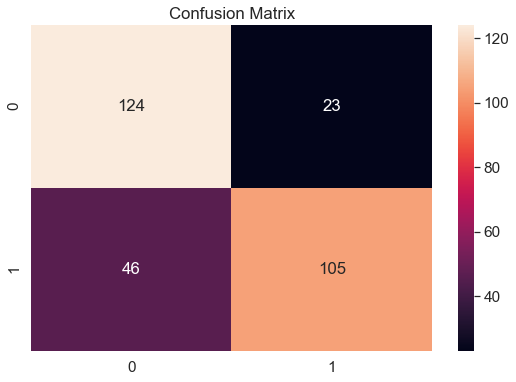

In [23]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")

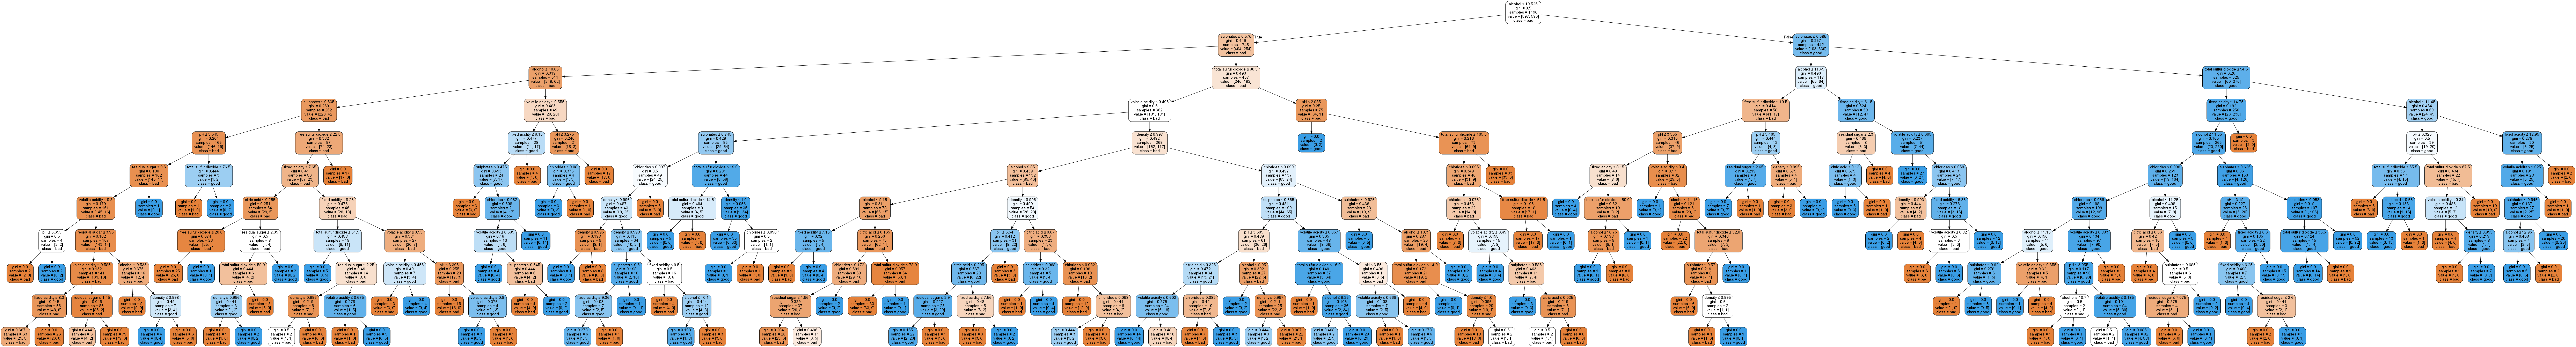

In [33]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep+"c:/Program Files (x86)/Graphviz2.38/bin"
#트리 그래프 출력
dot_data=export_graphviz(model, out_file=None,
                         feature_names=train_cols,
                         class_names=["bad","good"],filled=True,
                         rounded=True,special_characters=True)


graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

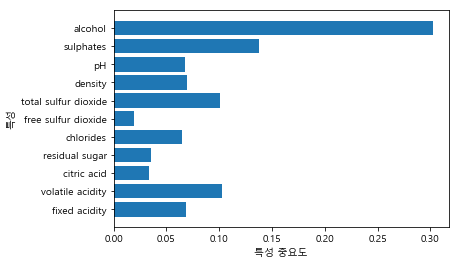

In [34]:
import numpy as np
rc("font",family=font_name)

def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_tree(model)    #특성 중요도 그래프 출력

In [35]:
from sklearn.ensemble import RandomForestClassifier

#랜덤포레스트 모델 생성  n_estimators 트리의 갯수
forest=RandomForestClassifier(n_estimators=100,random_state=10)
forest.fit(X_train,y_train) #모형 훈련
print(forest.score(X_train,y_train)) #학습용 정확도
print(forest.score(X_test,y_test)) #검증용 정확도

1.0
0.8322147651006712


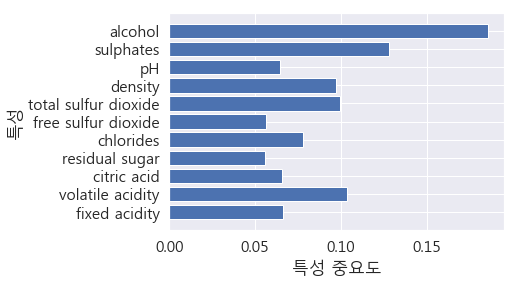

In [27]:
plot_tree(forest) #특성 중요도 그래프 출력